## 作業目標
* 畫出 16 個 bin 的顏色直方圖,並嘗試回答每個 channel 在 [16, 32] 這個 bin 中有多少個 pixel？
* 確保同學知道如何改變參數以及理解 cv2.calcHist 這個函數輸出的資料含義

In [1]:
import tensorflow as tf
import cv2 
import matplotlib.pyplot as plt

train, test = tf.keras.datasets.cifar10.load_data()

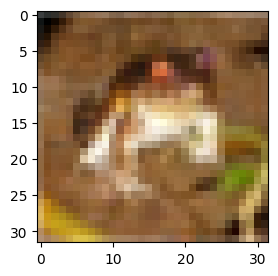

In [15]:
image = train[0][0] # each image size is (32, 32, 3)

plt.figure(figsize=(4, 3))
plt.imshow(image)
plt.show()

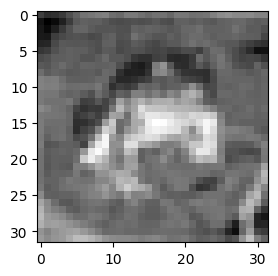

In [16]:
# 把彩色的圖片轉為灰度圖
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

plt.figure(figsize=(4, 3))
plt.imshow(gray, cmap="gray")
plt.show()

通過調用 __cv2.calcHist(images, channels, mask, histSize, ranges)__ 函數來得到統計後的直方圖值

* images (list of array)：要分析的圖片
* channels：產生的直方圖類型。例：[0]→灰度圖，[0, 1, 2]→RGB三色。
* mask：optional，若有提供則僅計算 mask 部份的直方圖。
* histSize：要切分的像素強度值範圍，預設為256。每個channel皆可指定一個範圍。例如，[32,32,32] 表示RGB三個channels皆切分為32區段。
* ranges：像素的範圍，預設為[0,256]，表示<256。

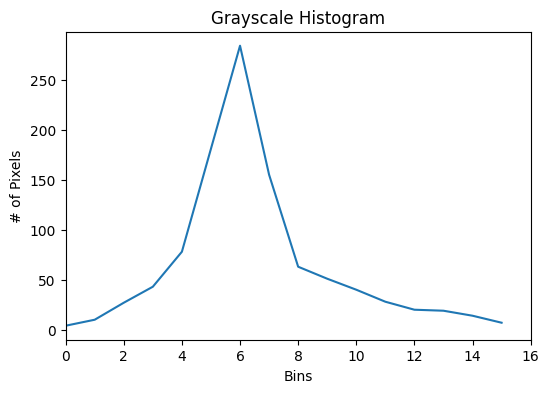

In [29]:
# 調用 cv2.calcHist 函數，回傳值就是 histogram
num_bins =16

hist = cv2.calcHist([gray], channels=[0], mask=None, histSize=[num_bins], ranges=[0, 256])
plt.figure(figsize=(6, 4))
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)
plt.xlim([0, num_bins])
plt.show()

In [35]:
print("hist shape:", hist.shape, "\n直方圖中落在(16,32)區間的pixel數:", hist[1]) 
# 有10個pixel落在[16,32]

hist shape: (16, 1) 
直方圖中落在(16,32)區間的pixel數: [10.]


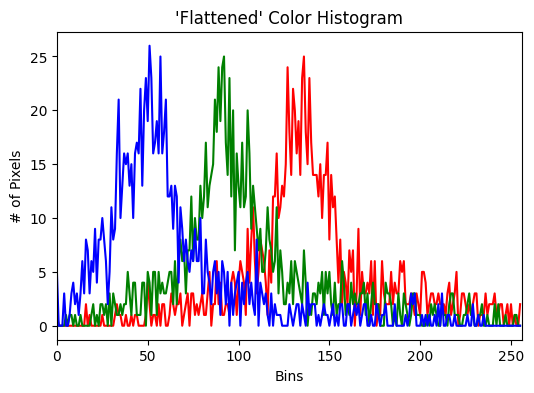

In [37]:
chans = cv2.split(image) # 把圖像的 3 個 channel 切分出來
colors = ("r", "g", "b")
plt.figure(figsize=(6, 4))
plt.title("'Flattened' Color Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")

# 對於所有 channel
for (chan, color) in zip(chans, colors):
    # 計算該 channel 的直方圖
    hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
 
    # 畫出該 channel 的直方圖
    plt.plot(hist, color = color)
    plt.xlim([0, 256])
plt.show()